In [1]:
import subprocess
from concurrent.futures import ThreadPoolExecutor
from os import cpu_count
import numpy as np
from time import time
import matplotlib.pyplot as plt
import json

ELEMENTS = 40
SUBSETS = 40
DENSITY_STDDEV = 0.01

GENERATOR_PATH = "./generator"
SCPCS_SOLVE_PATH = "./scpcs_solve"

densities = np.arange(0.1, 1.1, 0.1)


def exec_generator(density):
    subprocess.run(
        f"{GENERATOR_PATH} "
        f"-elems={ELEMENTS} "
        f"-sets={SUBSETS} "
        f"-out=./instances/inst_{density:.2f}.txt "
        f"-meand={density} "
        f"-stddevd={DENSITY_STDDEV}",
        shell=True,
    )


def exec_scpcs_solve(density):
    t = time()
    subprocess.run(
        f"{SCPCS_SOLVE_PATH} "
        f"-lagrangean "
        f"-threshold 2 "
        f"-inst=./instances/inst_{density:.2f}.txt",
        shell=True,
    )
    return time() - t


def exec_highs(density):
    t = time()
    subprocess.run(
        f"{SCPCS_SOLVE_PATH} "
        f"-highs "
        f"-threshold 2 "
        f"-inst=./instances/inst_{density:.2f}.txt",
        shell=True,
    )
    return time() - t

In [2]:
with ThreadPoolExecutor(max_workers=cpu_count()) as pool:
    pool.map(exec_generator, densities)

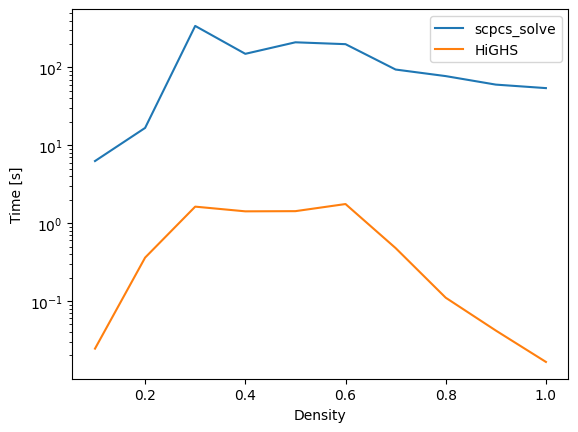

In [ ]:
scpcs_solve_times = [exec_scpcs_solve(d) for d in densities]
highs_times = [exec_highs(d) for d in densities]

with open("times.json", "w") as f:
    json.dump({"scpcs_solve": scpcs_solve_times, "highs": highs_times}, f)

plt.yscale("log")
plt.xlabel("Density")
plt.ylabel("Time [s]")
plt.plot(densities, scpcs_solve_times, label="scpcs_solve")
plt.plot(densities, highs_times, label="HiGHS")
plt.legend()
plt.show()